<a href="https://colab.research.google.com/github/mauricionoris/fm/blob/master/Arquimedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import math
def arquimedes(iterations=4):
    n = 6
    a = 1.0  # lado do hexágono inscrito no círculo de raio 1
    for _ in range(iterations):
        # dobra lados: n -> 2n
        a = math.sqrt(2.0 - math.sqrt(4.0 - a*a))  # lado inscrito para 2n
        n *= 2
        c = 2.0 * a / math.sqrt(4.0 - a*a)         # lado circunscrito para 2n
        lower = (n * a) / 2.0
        upper = (n * c) / 2.0
        print(f"n={n:3d} -> {lower:.12f} < pi < {upper:.12f}")

arquimedes(iterations=4)  # até 96 lados

n= 12 -> 3.105828541230 < pi < 3.215390309173
n= 24 -> 3.132628613281 < pi < 3.159659942097
n= 48 -> 3.139350203047 < pi < 3.146086215131
n= 96 -> 3.141031950891 < pi < 3.142714599645


In [6]:
import math
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

def polygon_coords(n: int, radius: float = 1.0, phase: float = 0.0):
    """Coordenadas (fechadas) de um polígono regular com n lados e raio 'radius'."""
    ang = np.linspace(0.0, 2.0 * np.pi, num=n, endpoint=False) + phase
    x = radius * np.cos(ang)
    y = radius * np.sin(ang)
    return np.append(x, x[0]), np.append(y, y[0])

def arquimedes_plots(iterations: int = 4, save: bool = True, outdir: str = "arquimedes_plots"):
    """
    Método de Arquimedes: dobra os lados a cada iteração (6→12→24→...),
    plota círculo, polígono inscrito e circunscrito e registra limites para π.
    """
    if save:
        os.makedirs(outdir, exist_ok=True)

    n = 6
    a = 1.0  # lado do hexágono inscrito em círculo de raio 1 (2*sin(pi/6)=1)
    rows = []

    print("Iter  n_lados           lower <  pi  < upper                gap")
    for i in range(1, iterations + 1):
        # Atualiza para 2n (ângulo meio sem trig direta para o lado inscrito)
        a = math.sqrt(2.0 - math.sqrt(4.0 - a * a))  # lado inscrito para 2n
        n *= 2
        c = (2.0 * a) / math.sqrt(4.0 - a * a)       # lado circunscrito correspondente

        lower = (n * a) / 2.0
        upper = (n * c) / 2.0
        gap = upper - lower
        print(f"{i:>4}  {n:>6}   {lower:.12f} <  pi  < {upper:.12f}    {gap:.3e}")

        # --- Plot desta iteração ---
        fig = plt.figure()
        # círculo
        t = np.linspace(0.0, 2.0 * np.pi, 1000)
        plt.plot(np.cos(t), np.sin(t), linewidth=1.5, label="Círculo (raio=1)")

        # polígono inscrito
        xi, yi = polygon_coords(n=n, radius=1.0, phase=0.0)
        plt.plot(xi, yi, linewidth=1.2, label=f"Inscrito n={n}")

        # polígono circunscrito (raio externo = 1/cos(pi/n), fase = pi/n)
        R_out = 1.0 / math.cos(math.pi / n)
        xo, yo = polygon_coords(n=n, radius=R_out, phase=math.pi / n)
        plt.plot(xo, yo, linewidth=1.2, label=f"Circunscrito n={n}")

        ax = plt.gca()
        ax.set_aspect("equal", adjustable="box")
        lim = 1.15 * R_out
        plt.xlim(-lim, lim)
        plt.ylim(-lim, lim)
        plt.title(f"Iteração {i} — n={n}  |  {lower:.12f} < π < {upper:.12f}  (gap={gap:.2e})")
        plt.legend(loc="best")
        plt.xlabel("x")
        plt.ylabel("y")

        if save:
            fig.savefig(os.path.join(outdir, f"iter_{i:02d}_n{n}.png"), dpi=150, bbox_inches="tight")
        plt.show()

        rows.append({"iteracao": i, "n_lados": n, "lower": lower, "upper": upper, "gap": gap})

    # Tabela final com os limites
    df = pd.DataFrame(rows, columns=["iteracao", "n_lados", "lower", "upper", "gap"])
    display(df)

    if save:
        # Compacta as figuras em um .zip para baixar pelo Colab (arquivos na aba lateral)
        zpath = outdir + ".zip"
        with zipfile.ZipFile(zpath, "w", zipfile.ZIP_DEFLATED) as z:
            for fname in sorted(os.listdir(outdir)):
                if fname.endswith(".png"):
                    z.write(os.path.join(outdir, fname), arcname=fname)
        print(f"Arquivos salvos em: {outdir}/  e {zpath}")


Iter  n_lados           lower <  pi  < upper                gap
   1      12   3.105828541230 <  pi  < 3.215390309173    1.096e-01


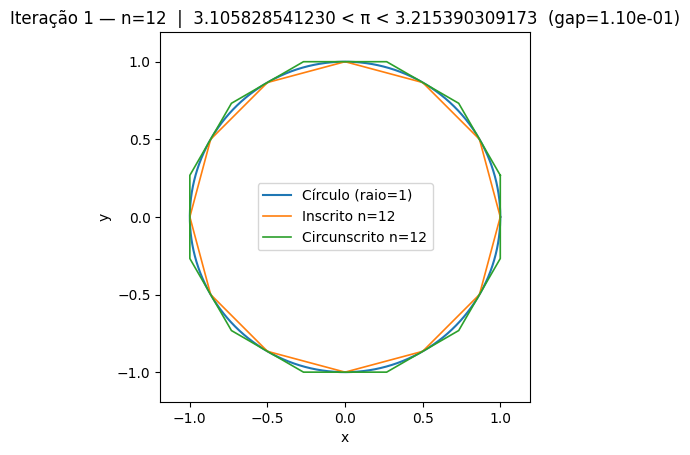

   2      24   3.132628613281 <  pi  < 3.159659942097    2.703e-02


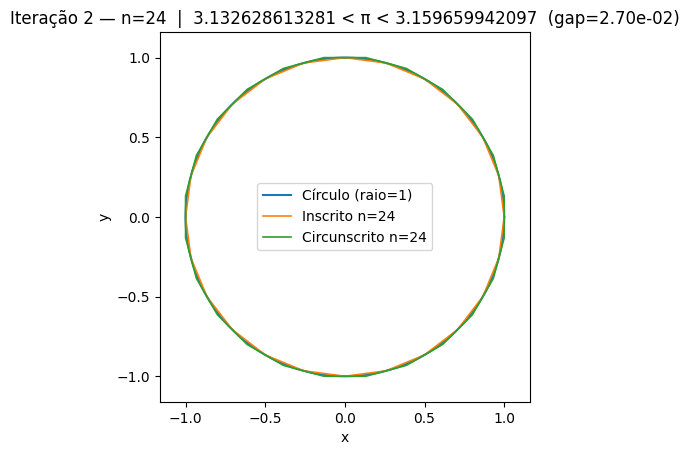

   3      48   3.139350203047 <  pi  < 3.146086215131    6.736e-03


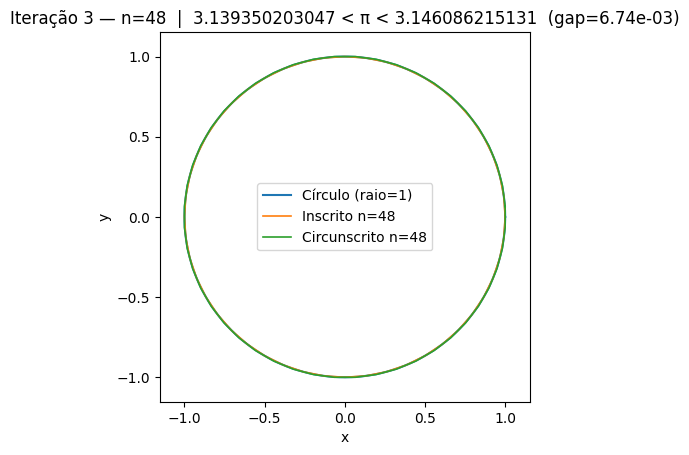

   4      96   3.141031950891 <  pi  < 3.142714599645    1.683e-03


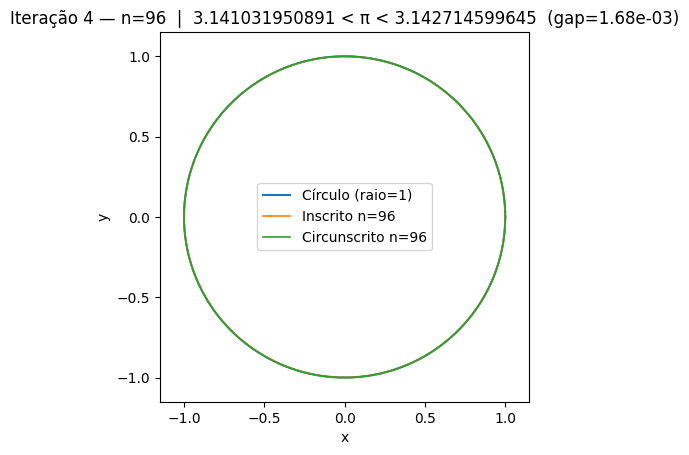

   5     192   3.141452472285 <  pi  < 3.141873049980    4.206e-04


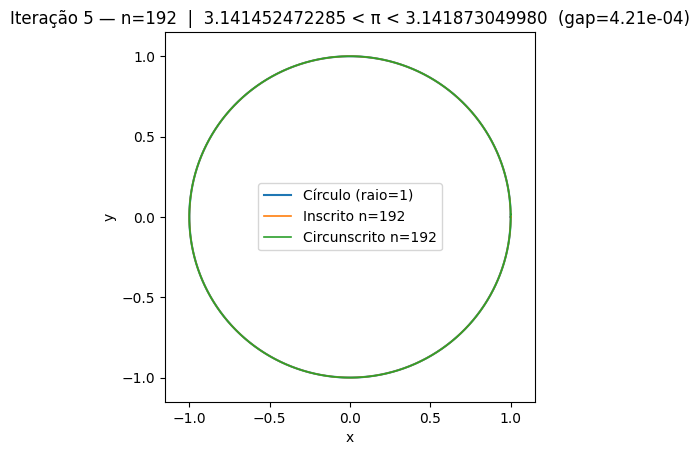

,iteracao,n_lados,lower,upper,gap
0,1,12,3.105829,3.215390,0.109562
1,2,24,3.132629,3.159660,0.027031
2,3,48,3.139350,3.146086,0.006736
3,4,96,3.141032,3.142715,0.001683
4,5,192,3.141452,3.141873,0.000421


Arquivos salvos em: arquimedes_plots/  e arquimedes_plots.zip


In [7]:
# Ex.: 5 iterações → n = 6 * 2^5 = 192 lados
arquimedes_plots(iterations=5, save=True, outdir="arquimedes_plots")


In [8]:
!pip -q install ipywidgets
from ipywidgets import interact, IntSlider

def _run(iterations=4):
    arquimedes_plots(iterations=iterations, save=False)

interact(_run, iterations=IntSlider(min=1, max=8, step=1, value=4));


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.2 MB/s eta 0:00:00


interactive(children=(IntSlider(value=4, description='iterations', max=8, min=1), Output()), _dom_classes=('wi…